In [54]:
print ("Welcome to Python")

Welcome to Python


In [55]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

# Any results you write to the current directory are saved as output.

In [56]:
dataset_train = pd.read_csv("testset.csv")

In [57]:
dataset_train

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-01-02,1048.339966,1066.939941,1045.229980,1065.000000,1065.000000,1237600
1,2018-01-03,1064.310059,1086.290039,1063.209961,1082.479980,1082.479980,1430200
2,2018-01-04,1088.000000,1093.569946,1084.001953,1086.400024,1086.400024,1004600
3,2018-01-05,1094.000000,1104.250000,1092.000000,1102.229980,1102.229980,1279100
4,2018-01-08,1102.229980,1111.270020,1101.619995,1106.939941,1106.939941,1047600
...,...,...,...,...,...,...,...
120,2018-06-25,1143.599976,1143.910034,1112.780029,1124.810059,1124.810059,2157300
121,2018-06-26,1128.000000,1133.209961,1116.659058,1118.459961,1118.459961,1563200
122,2018-06-27,1121.339966,1131.836060,1103.619995,1103.979980,1103.979980,1293900
123,2018-06-28,1102.089966,1122.310059,1096.010010,1114.219971,1114.219971,1072400


In [58]:
trainset = dataset_train.iloc[:,1:2].values

In [59]:
trainset

array([[1048.339966],
       [1064.310059],
       [1088.      ],
       [1094.      ],
       [1102.22998 ],
       [1109.400024],
       [1097.099976],
       [1106.300049],
       [1102.410034],
       [1132.51001 ],
       [1126.219971],
       [1131.410034],
       [1131.829956],
       [1137.48999 ],
       [1159.849976],
       [1177.329956],
       [1172.530029],
       [1175.079956],
       [1176.47998 ],
       [1167.829956],
       [1170.569946],
       [1162.609985],
       [1122.      ],
       [1090.599976],
       [1027.180054],
       [1081.540039],
       [1055.410034],
       [1017.25    ],
       [1048.      ],
       [1045.      ],
       [1048.949951],
       [1079.069946],
       [1088.410034],
       [1090.569946],
       [1106.469971],
       [1116.189941],
       [1112.640015],
       [1127.800049],
       [1141.23999 ],
       [1123.030029],
       [1107.869995],
       [1053.079956],
       [1075.140015],
       [1099.219971],
       [1089.189941],
       [11

In [60]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)

In [61]:
training_scaled

array([[0.29866245],
       [0.3854942 ],
       [0.51429989],
       [0.54692277],
       [0.59167038],
       [0.63065497],
       [0.5637778 ],
       [0.61379995],
       [0.59264936],
       [0.75630736],
       [0.72210749],
       [0.75032663],
       [0.75260981],
       [0.78338424],
       [0.90495878],
       [1.        ],
       [0.97390209],
       [0.98776642],
       [0.99537856],
       [0.9483471 ],
       [0.96324483],
       [0.91996535],
       [0.69916289],
       [0.52843634],
       [0.1836129 ],
       [0.47917613],
       [0.33710345],
       [0.12962173],
       [0.29681401],
       [0.28050257],
       [0.30197903],
       [0.46574587],
       [0.51652931],
       [0.52827306],
       [0.61472384],
       [0.66757275],
       [0.64827128],
       [0.73069861],
       [0.80377355],
       [0.70476331],
       [0.62233598],
       [0.32443447],
       [0.44437826],
       [0.57530452],
       [0.52076977],
       [0.66284245],
       [0.77528295],
       [0.926

In [62]:
x_train = []
y_train = []

In [63]:
x_train_list = []
y_train_list = []

for i in range(60, len(training_scaled)):
    x_train_list.append(training_scaled[i-60:i, 0])
    y_train_list.append(training_scaled[i,0])

x_train = np.array(x_train_list)
y_train = np.array(y_train_list)

In [64]:
x_train.shape

(65, 60)

In [65]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))

In [66]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [67]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))

In [68]:
regressor.add(Dropout(0.2))

In [69]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [70]:
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))

In [71]:
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))

In [72]:
regressor.add(Dense(units = 1))

In [73]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

In [74]:
regressor.fit(x_train,y_train,epochs = 100, batch_size = 32)

Epoch 1/100
3/3 [==============================] - 18s 202ms/step - loss: 0.2499
Epoch 2/100
3/3 [==============================] - 1s 196ms/step - loss: 0.1017
Epoch 3/100
3/3 [==============================] - 1s 195ms/step - loss: 0.1905
Epoch 4/100
3/3 [==============================] - 1s 194ms/step - loss: 0.0924
Epoch 5/100
3/3 [==============================] - 1s 198ms/step - loss: 0.0776
Epoch 6/100
3/3 [==============================] - 1s 190ms/step - loss: 0.0948
Epoch 7/100
3/3 [==============================] - 1s 194ms/step - loss: 0.0966
Epoch 8/100
3/3 [==============================] - 1s 196ms/step - loss: 0.0906
Epoch 9/100
3/3 [==============================] - 1s 196ms/step - loss: 0.0710
Epoch 10/100
3/3 [==============================] - 1s 195ms/step - loss: 0.0643
Epoch 11/100
3/3 [==============================] - 1s 189ms/step - loss: 0.0680
Epoch 12/100
3/3 [==============================] - 1s 199ms/step - loss: 0.0655
Epoch 13/100
3/3 [==================

In [75]:
dataset_test =pd.read_csv("testset.csv")

In [76]:
real_stock_price = dataset_test.iloc[:,1:2].values

In [77]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)
dataset_total

0      1048.339966
1      1064.310059
2      1088.000000
3      1094.000000
4      1102.229980
          ...     
120    1143.599976
121    1128.000000
122    1121.339966
123    1102.089966
124    1120.000000
Name: Open, Length: 250, dtype: float64

In [79]:
inputs = dataset_total[len(dataset_total) - len(dataset_test)-60:].values
inputs

array([1020.      , 1016.799988, 1026.439941, 1027.98999 , 1025.040039,
       1040.880005, 1037.      , 1051.369995, 1077.430054, 1069.400024,
       1082.      , 1077.859985, 1052.      , 1025.52002 , 1029.51001 ,
       1046.      , 1030.01001 , 1013.659973, 1028.099976, 1019.      ,
       1016.900024, 1049.22998 , 1058.540039, 1058.099976, 1086.030029,
       1093.599976, 1100.      , 1090.      , 1077.310059, 1079.890015,
       1061.859985, 1074.060059, 1083.560059, 1065.130005, 1079.      ,
       1079.02002 , 1064.890015, 1063.030029, 1067.560059, 1099.349976,
       1122.329956, 1140.98999 , 1142.170044, 1131.319946, 1118.180054,
       1118.599976, 1131.069946, 1141.119995, 1143.849976, 1148.859985,
       1143.650024, 1158.5     , 1175.310059, 1174.849976, 1159.140015,
       1143.599976, 1128.      , 1121.339966, 1102.089966, 1120.      ,
       1048.339966, 1064.310059, 1088.      , 1094.      , 1102.22998 ,
       1109.400024, 1097.099976, 1106.300049, 1102.410034, 1132.

In [80]:
inputs = inputs.reshape(-1,1)

In [81]:
inputs

array([[1020.      ],
       [1016.799988],
       [1026.439941],
       [1027.98999 ],
       [1025.040039],
       [1040.880005],
       [1037.      ],
       [1051.369995],
       [1077.430054],
       [1069.400024],
       [1082.      ],
       [1077.859985],
       [1052.      ],
       [1025.52002 ],
       [1029.51001 ],
       [1046.      ],
       [1030.01001 ],
       [1013.659973],
       [1028.099976],
       [1019.      ],
       [1016.900024],
       [1049.22998 ],
       [1058.540039],
       [1058.099976],
       [1086.030029],
       [1093.599976],
       [1100.      ],
       [1090.      ],
       [1077.310059],
       [1079.890015],
       [1061.859985],
       [1074.060059],
       [1083.560059],
       [1065.130005],
       [1079.      ],
       [1079.02002 ],
       [1064.890015],
       [1063.030029],
       [1067.560059],
       [1099.349976],
       [1122.329956],
       [1140.98999 ],
       [1142.170044],
       [1131.319946],
       [1118.180054],
       [11

In [82]:
inputs = sc.transform(inputs)
inputs.shape

(185, 1)

In [83]:
x_test = []
for i in range(60,185):
    x_test.append(inputs[i-60:i,0])

In [84]:
x_test = np.array(x_test)
x_test.shape

(125, 60)

In [85]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
x_test.shape

(125, 60, 1)

In [86]:
predicted_price = regressor.predict(x_test)

4/4 [==============================] - 4s 76ms/step


In [87]:
predicted_price = sc.inverse_transform(predicted_price)
predicted_price

array([[1117.7216],
       [1109.1932],
       [1100.1176],
       [1091.2933],
       [1082.8689],
       [1075.0204],
       [1068.3916],
       [1062.5032],
       [1057.7457],
       [1054.159 ],
       [1051.0524],
       [1048.7025],
       [1046.7815],
       [1045.0317],
       [1043.4906],
       [1042.4424],
       [1041.9124],
       [1041.5781],
       [1041.3826],
       [1041.3901],
       [1041.3679],
       [1041.282 ],
       [1041.1732],
       [1040.8241],
       [1040.111 ],
       [1038.9779],
       [1037.5343],
       [1035.9003],
       [1034.1006],
       [1032.2996],
       [1030.6487],
       [1029.2141],
       [1028.1527],
       [1027.52  ],
       [1027.2893],
       [1027.4833],
       [1028.0532],
       [1028.9081],
       [1029.9993],
       [1031.2856],
       [1032.6759],
       [1034.0245],
       [1035.1003],
       [1035.834 ],
       [1036.2927],
       [1036.5363],
       [1036.7101],
       [1036.9686],
       [1037.4474],
       [1038.1914],


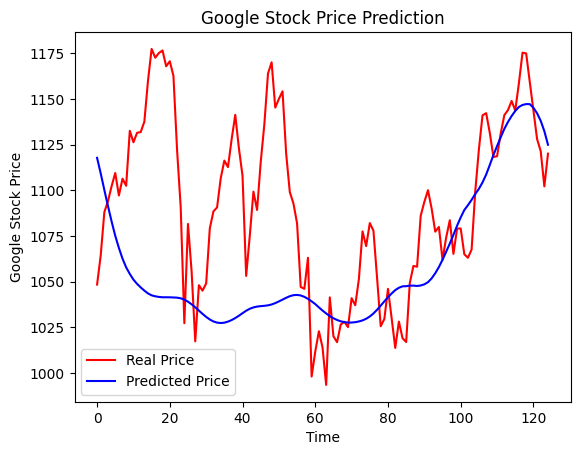

In [88]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('Google Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()